# **Bike Sharing Demand**

## **Import Required Libraries**

In [1]:
# Data Visualisation and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import the necessary modelling algos.
#regression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#evaluation metrics
from sklearn.metrics import mean_squared_log_error

# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

## **Load the Data**

In [2]:
df_train=pd.read_csv('train.csv',parse_dates = ['datetime'])
df_test=pd.read_csv('train.csv',parse_dates = ['datetime'])

In [3]:
# checking the first five rows of train data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**A SHORT DESCRIPTION OF THE DATA FEATURES-**<br>

datetime -> hourly date + timestamp

season -> 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday -> whether the day is considered a holiday

workingday -> whether the day is neither a weekend nor holiday

weather ->

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp -> temperature in Celsius

atemp -> "feels like" temperature in Celsius

humidity -> relative humidity

windspeed -> wind speed

casual -> number of non-registered user rentals initiated

registered -> number of registered user rentals initiated

count -> number of total rentals


In [4]:
# checking Shape of the data
df_train.shape

(10886, 12)

In [5]:
# Summary Statistics 
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# checking missing values in training dataset
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**No Missing Value, hence no imputation needed.**

In [7]:
# checking datatypes
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

**HERE ALL THE VARIABLES  ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE 'count' VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE 'count' VARIABLE IS CONTINUOUS HERE.**

## **Feature Engineering**

As we can see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Lets transform the dataset in the following ways so that we can get started up with our EDA.

* **Create new columns "Year","Day,"hour","weekDay","month" from "datetime" column.**
* **Coerce the datatype of "season" and 'weather' to category.**
* **Drop the datetime column as we already extracted useful features from it.**

In [8]:
# Create new columns "Year","Day,"hour","weekDay","month" from "datetime" column.
df_train['Year'] = df_train.datetime.dt.year
df_train['Month'] = df_train.datetime.dt.month
df_train['Day'] = df_train.datetime.dt.day
df_train['Hour'] = df_train.datetime.dt.hour
df_train['Wday'] = df_train.datetime.dt.weekday

In [9]:
# Coerce the datatype of "season" and 'weather' to category.
# 1 = spring, 2 = summer, 3 = fall, 4 = winter 
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

# Weather
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }) 

categoricalVariableList = ["season","weather",'Year']
for var in categoricalVariableList:
    df_train[var] = df_train[var].astype("category")

## **Exploratory Data Analysis(EDA)**

### Correlation Analysis

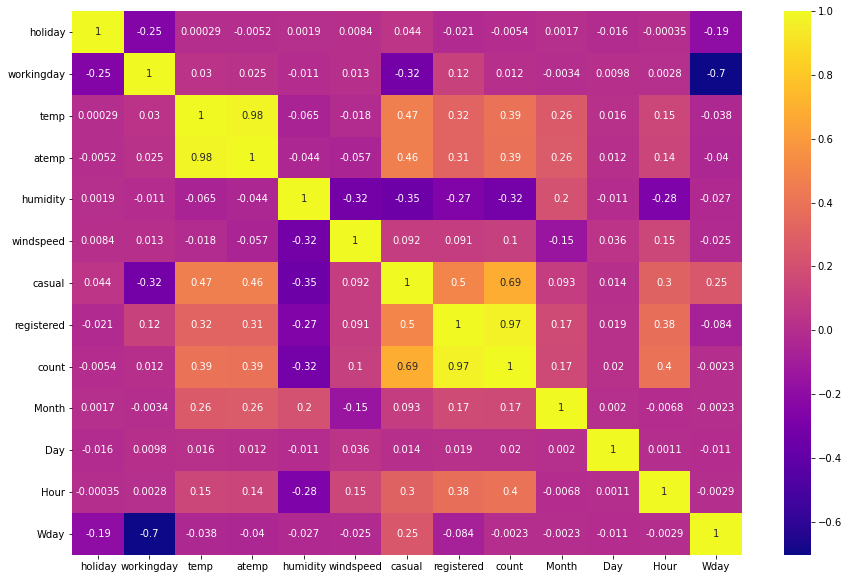

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,cmap='plasma')
plt.show()

**Insights-**

* temp and humidity feature has got positive and negative correlation with count respectively.
* windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count".
* humidity is inversely related to count as expected as the weather is humid, people will not like to travel on a bike.
* registered/casual and count are highly correlated which indicates that most of the bikes that are rented are registered.
* "atemp" is variable is not taken into account since "atemp" and "temp" has got very strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
* "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

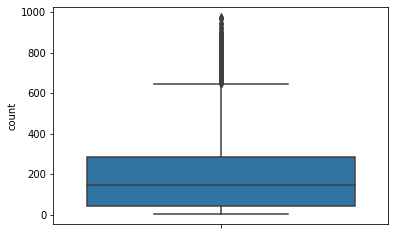

In [11]:
# Lets Explore our target variable
sns.boxplot(data=df_train,y="count")
plt.show()

**Boxplot Shows that "count" variable contains lot of outlier data points.**

* Lets Remove Outliers In The Count Column

In [12]:
Q1 = df_train['count'].quantile(0.25)
Q3 = df_train['count'].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[~((df_train['count'] < (Q1 - 1.5 * IQR)) |(df_train['count'] > (Q3 + 1.5 * IQR)))]
df_train.shape

(10586, 17)

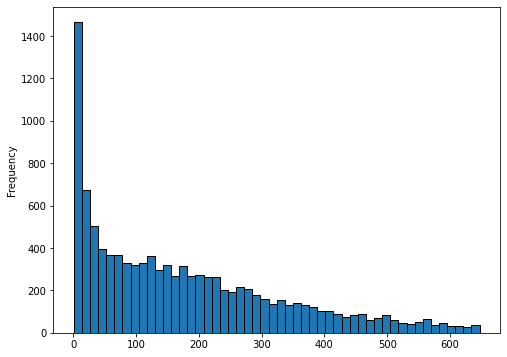

In [13]:
# lets check the distribution of count variable
plt.figure(figsize=(8,6))
df_train['count'].plot(kind='hist',bins=50,ec='black')
plt.show()

**NOW WE CAN EXPLORE OUR FEATURES. FIRST LETS EXPLORE THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES LIKE weather , season etc...**

### Boxplot of Season

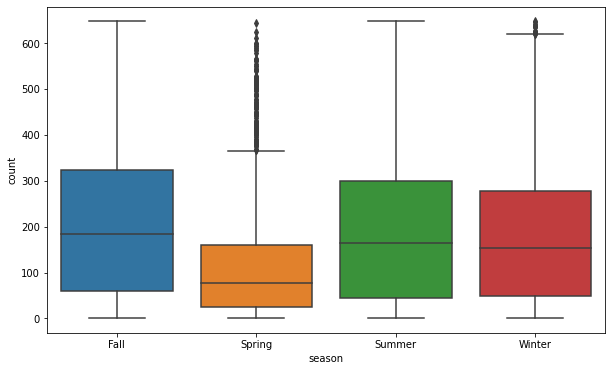

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train,y="count",x="season",orient="v")
plt.show()

**Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.**

### Boxplot of Hour

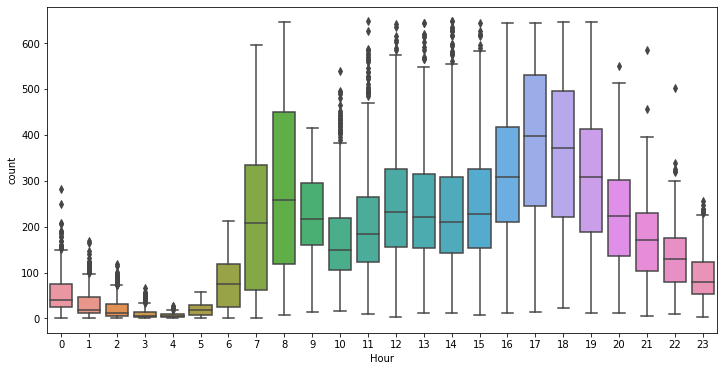

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train,y="count",x="Hour",orient="v")
plt.show()

**The boxplot of "Hour" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.**

### Boxplot of WorkingDay

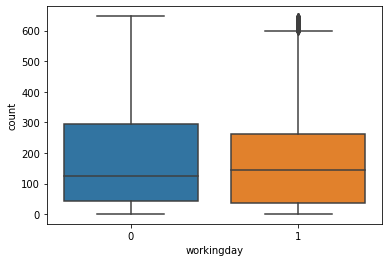

In [16]:
sns.boxplot(data=df_train,y="count",x="workingday",orient="v")
plt.show()

**Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day".**

### Average Count by Month

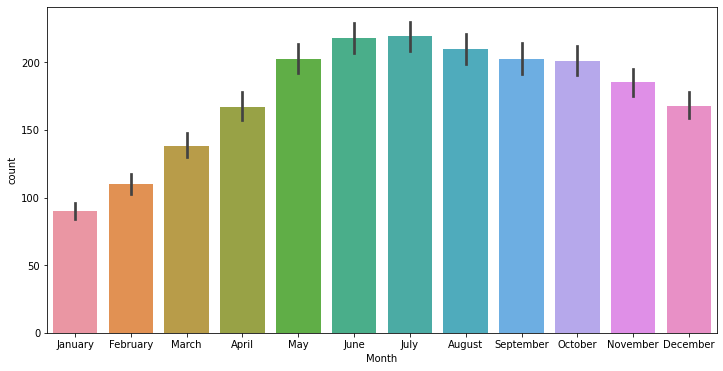

In [17]:
plt.figure(figsize=(12,6))
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
g = sns.barplot(data=df_train,x="Month",y="count")
g.set_xticklabels(sortOrder)
plt.show()

**It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.**

### Average Users Count By Hour Of The Day Across Season

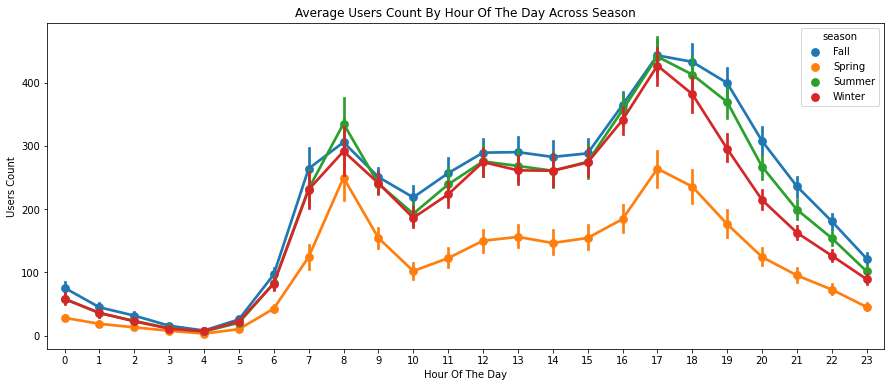

In [18]:
plt.figure(figsize=(15,6))
l = sns.pointplot(x=df_train["Hour"], y=df_train["count"],hue=df_train["season"], data=df_train, join=True)
l.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
plt.show()

**More people tend to rent bicycle around 7AM-8AM and 5PM-6PM.**

### Average Users Count By Hour Of The Day Across Weekdays

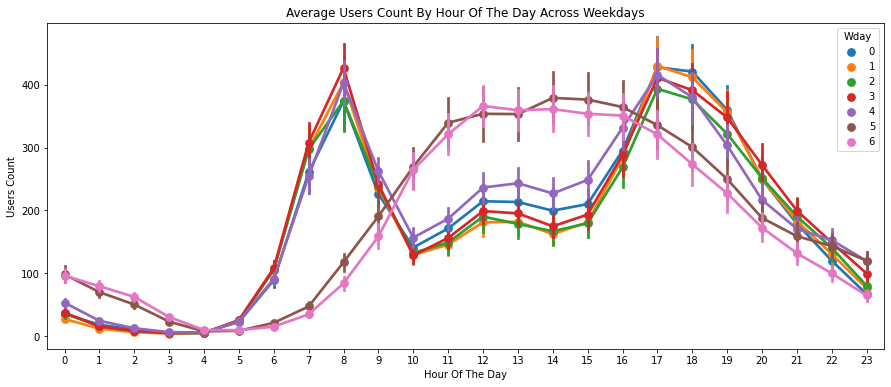

In [19]:
plt.figure(figsize=(15,6))
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
m = sns.pointplot(x=df_train["Hour"], y=df_train["count"],hue=df_train["Wday"], data=df_train, join=True)
m.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
plt.show()

**As we mentioned earlier On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. this can be attributed to regular school and office users and on weekends "Saturday(5)" and "Sunday(6)",More people tend to rent bicycle between 10AM and 4PM.**

### Distribution of Holiday

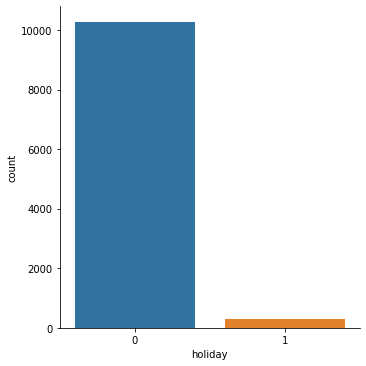

In [20]:
#holiday
sns.factorplot(x='holiday',data=df_train,kind='count',size=5,aspect=1)
plt.show()

**Majority of data is for non holiday days.**

### Distribution of Continuous Variables

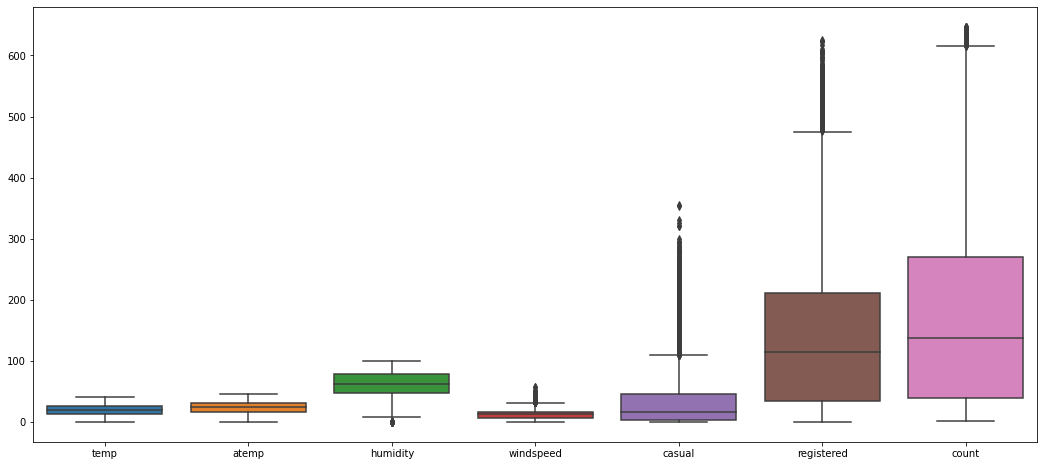

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
plt.show()

**NOW WE CAN DO SOME MORE FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES.**

### Encoding Categorical features with dummy encoding

In [22]:
dummy_train = pd.get_dummies(df_train[['season','weather','Year']],drop_first=True)
df_train = pd.concat([df_train,dummy_train],axis=1)

In [23]:
# now drop unneccesary columns.
df_train.drop(['season','weather','datetime','atemp','casual','registered','Year'],inplace=True,axis=1)

In [24]:
df_train.shape

(10586, 17)

## **Feature Engineering and Data Cleaning in Test Data**

In [25]:
# Create new columns "Year","Day,"hour","weekDay","month" from "datetime" column.
dates = df_test['datetime']
df_test['Year'] = df_test.datetime.dt.year
df_test['Month'] = df_test.datetime.dt.month
df_test['Day'] = df_test.datetime.dt.day
df_test['Hour'] = df_test.datetime.dt.hour
df_test['Wday'] = df_test.datetime.dt.weekday 

# Coerce the datatype of "season" and 'weather' to category.
df_test["season"] = df_test.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_test["weather"] = df_test.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }) 

categoricalVariableListTest = ["season","weather",'Year']
for var in categoricalVariableListTest:
    df_test[var] = df_test[var].astype("category")

dummy_test = pd.get_dummies(df_test[['season','weather','Year']],drop_first=True)
df_test = pd.concat([df_test,dummy_test],axis=1) 

# now drop unneccesary columns.
df_test.drop(['season','weather','datetime','atemp','Year'],inplace=True,axis=1)
print(df_test.shape)

(6493, 16)


In [26]:
num_features = ['temp','humidity','windspeed']

## **Model Building**

#### Separate Dependent and Independent variables From Train Data

In [27]:
X = df_train.drop('count',axis=1)
y = df_train['count']

### Data Scaling 

In [28]:
sc = MinMaxScaler()

X[num_features] = sc.fit_transform(X[num_features])
df_test[num_features] = sc.transform(df_test[num_features])

#### Lets split the data into train and test set 

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### **Random Forest**

In [30]:
# model fitting
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit( X_train , y_train )

RandomForestRegressor(random_state=42)

In [31]:
# Prediction
y_pred = model_rf.predict(X_test)

In [32]:
# checking the rmsle
print(np.sqrt(mean_squared_log_error(y_test,y_pred)))

0.32091895219688027


In [33]:
##########################Feature Importance########################
for name, importance in zip(X.columns, model_rf.feature_importances_):
    print(name, "=", importance)

holiday = 0.0017203874234535275
workingday = 0.04009455348582351
temp = 0.10202668253719649
humidity = 0.03708094987096231
windspeed = 0.010586899178934113
Month = 0.04656021167298726
Day = 0.013672945872599334
Hour = 0.6198296166347168
Wday = 0.03304233771593283
season_Spring = 0.010719784292736937
season_Summer = 0.001465853571905111
season_Winter = 0.0013557279049697356
weather_ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  = 3.747074354027662e-06
weather_ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = 0.014860984604197831
weather_ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  = 0.0018978481972500426
Year_2012 = 0.06508146996198022


### Lets try Different Models

### **AdaBoost**

In [34]:
model_abr = AdaBoostRegressor(random_state=42)
model_abr.fit( X_train , y_train )
y_pred_abr = model_abr.predict(X_test)
print(np.sqrt(mean_squared_log_error(y_test,y_pred_abr)))

0.9398321121705452


### **KNN**

In [35]:
model_knn = KNeighborsRegressor()
model_knn.fit( X_train , y_train )
y_pred_knn = model_knn.predict(X_test)
print(np.sqrt(mean_squared_log_error(y_test,y_pred_knn)))

0.4595187372772124


**Note That there are other modeling algos like linear regression ,ridge regression,lasso regression,Xgboost etc but the problem is that most of the models are predicting negative values for the target which is not possible thats why I am just limited to above models and try to tune the best model.**

**RANDOM FORETS REGRESSOR GIVES THE LEAST RMSLE. HENCE WE USE IT TO MAKE PREDICTIONS.**<br>

### **Lets Tune a bit More for Random Forest Regressor**

In [36]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42,shuffle=True)

params_dict = {'n_estimators':[200,300,400],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
reg_rf = GridSearchCV(estimator= model_rf,param_grid = params_dict,scoring = 'neg_mean_squared_log_error',cv = kfold)
reg_rf.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400], 'n_jobs': [-1]},
             scoring='neg_mean_squared_log_error')

In [37]:
# checking the best parameter
reg_rf.best_params_

{'max_features': 'auto', 'n_estimators': 400, 'n_jobs': -1}

In [38]:
# Final Model 
final_rf = RandomForestRegressor(max_features = 'auto', n_estimators= 400, n_jobs= -1,random_state=42)
final_rf.fit(X,y)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

### **Model Prediction**

In [39]:
y_pred_final = final_rf.predict(df_test)